Using the titanic dataset we will be able to predict the chances of one surving. We will consider several factors(variables) and the chances of one surving 

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()
df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [3]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Data Cleaning 

In [3]:
df.isnull().sum()# can we drop columns that are lack missing values but are irrelevant in the process e.g name
                # can we just drop columns that don't appear in the spearmans heatmap 
titanic_df = df.drop(['Name', 'Sex','Ticket','Cabin','Embarked'], axis=1)
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [4]:
#impute the missing values with their median
titanic_df.isnull().sum()
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

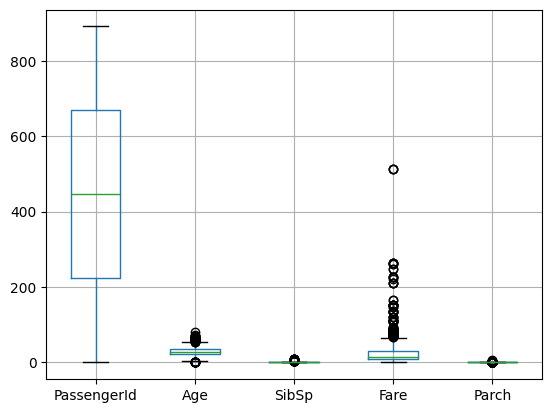

In [5]:
#detect outliners using boxplot
numeric_col = ['PassengerId','Age','SibSp','Fare','Parch']
titanic_df.boxplot(numeric_col)
plt.show()

In [6]:
#remove outliers
for x in ['Age']:
    q75,q25 = np.percentile(titanic_df.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)#estmate upper boung
    min = q25-(1.5*intr_qr)#estimate lower bound
    titanic_df.loc[titanic_df[x]<min,x] = np.nan
    titanic_df.loc[titanic_df[x]>max,x] = np.nan
    
for x in ['SibSp']:
    q75,q25 = np.percentile(titanic_df.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)#estmate upper boung
    min = q25-(1.5*intr_qr)#estimate lower bound
    titanic_df.loc[titanic_df[x]<min,x] = np.nan
    titanic_df.loc[titanic_df[x]>max,x] = np.nan
    
for x in ['Fare']:
    q75,q25 = np.percentile(titanic_df.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)#estmate upper boung
    min = q25-(1.5*intr_qr)#estimate lower bound
    titanic_df.loc[titanic_df[x]<min,x] = np.nan
    titanic_df.loc[titanic_df[x]>max,x] = np.nan
    
for x in ['Parch']:
    q75,q25 = np.percentile(titanic_df.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)#estmate upper boung
    min = q25-(1.5*intr_qr)#estimate lower bound
    titanic_df.loc[titanic_df[x]<min,x] = np.nan
    titanic_df.loc[titanic_df[x]>max,x] = np.nan  

Data Visualization

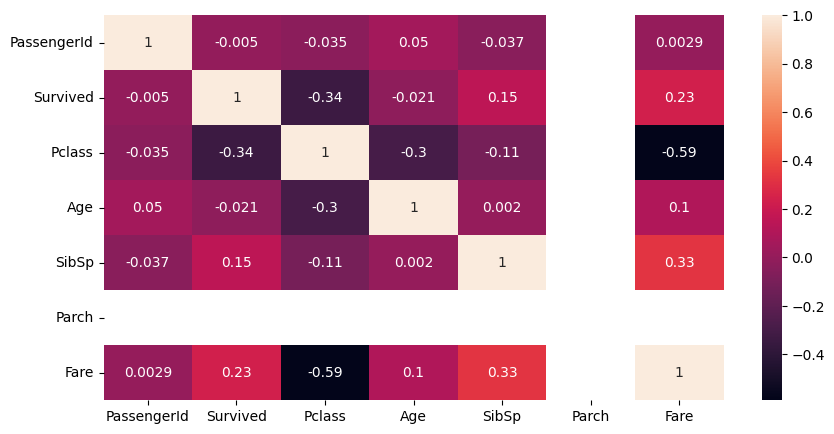

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(titanic_df.corr(), annot=True)
plt.show()

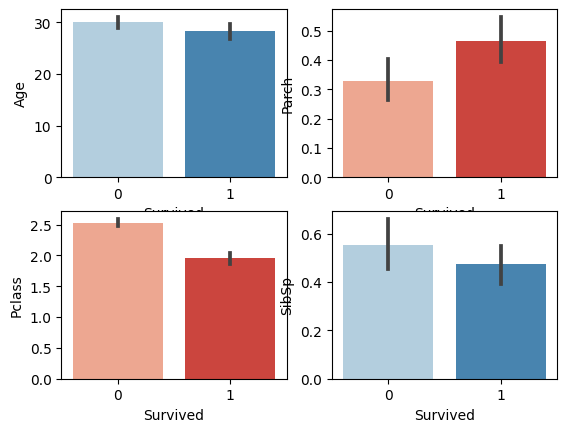

In [12]:
#define plotting region(2rows, 2 columns)
fig, axes = plt.subplots(2,2)
sns.barplot(x ='Survived', y='Age', ax=axes[0,0], data = titanic_df, palette="Blues")
sns.barplot(x ='Survived', y='Parch', ax=axes[0,1], data = titanic_df, palette="Reds")
sns.barplot(x ='Survived', y='Pclass', ax=axes[1,0], data = titanic_df, palette="Reds")
sns.barplot(x ='Survived', y='SibSp', ax=axes[1,1], data = titanic_df, palette="Blues")
plt.show()

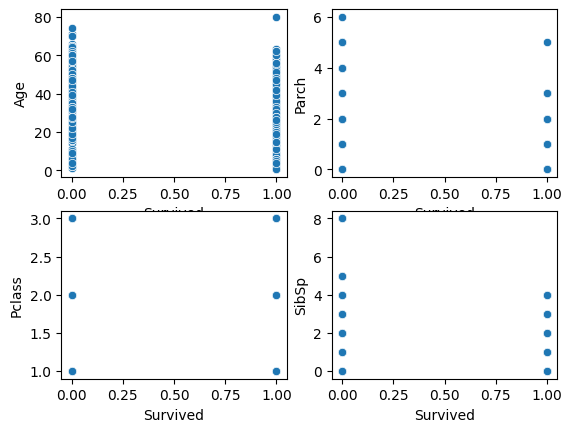

In [19]:
fig, axes = plt.subplots(2,2)
sns.scatterplot(x ='Survived', y='Age', ax=axes[0,0], data = titanic_df)
sns.scatterplot(x ='Survived', y='Parch', ax=axes[0,1], data = titanic_df)
sns.scatterplot(x ='Survived', y='Pclass', ax=axes[1,0], data = titanic_df)
sns.scatterplot(x ='Survived', y='SibSp', ax=axes[1,1], data = titanic_df)
plt.show()